## **Sentiment Analysis**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import kagglehub
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

d:\Data Science\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing Data 1

In [2]:
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\abhi8923shriv\sentiment-analysis-dataset\versions\9


In [3]:
import os
files = os.listdir(path)
files

['test.csv',
 'testdata.manual.2009.06.14.csv',
 'train.csv',
 'training.1600000.processed.noemoticon.csv']

In [4]:
path1=path+'/'+files[0]
path2=path+'/'+files[1]
path3=path+'/'+files[2]
path4=path+'/'+files[3]
display(path1)

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\abhi8923shriv\\sentiment-analysis-dataset\\versions\\9/test.csv'

In [5]:
import pandas as pd
df1 = pd.read_csv(path1, encoding="iso-8859-1")

In [6]:
display(df1.sample(5))
display(df1.shape)
display(df1.columns)
display(df1.info())


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
2110,52eaf44b44,Good Morning. It`s Friday and the start of my ...,positive,noon,21-30,Montenegro,628066.0,13450.0,47.0
4610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,587cf8a61e,it is my honor,positive,morning,46-60,Turkmenistan,6031200.0,469930.0,13.0
1212,496abe9ad9,no wonder you hate driving and country roads ...,negative,morning,0-20,Georgia,3989167.0,69490.0,57.0
454,4dd3339756,just left & already misses Nashville be back ...,negative,noon,60-70,Germany,83783942.0,348560.0,240.0


(4815, 9)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


None

In [7]:
df2 = pd.read_csv(path2, encoding='utf-8')
display(df2.sample(2))
display(df2.shape)
display(df2.info())

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
374,2,2369,Tue Jun 02 03:00:51 UTC 2009,gm,economywire,Obama: Nationalization of GM to be short-term ...
476,4,13053,Sat Jun 13 16:24:12 UTC 2009,Bobby Flay,ZFilth,Gonna go see Bobby Flay 2moro at Shoreline. Ea...


(515, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   4                                                                                                                515 non-null    int64 
 1   3                                                                                                                515 non-null    int64 
 2   Mon May 11 03:17:40 UTC 2009                                                                                     515 non-null    object
 3   kindle2                                                                                                          515 non-null    object
 4   tpryan                                       

None

In [8]:
df3 = pd.read_csv(path3, encoding="iso-8859-1")
display(df3.sample(5))
display(df3.shape)
display(df3.columns)
display(df3.info())

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
7059,4e90230366,cool and aww,cool and aww,positive,morning,46-60,Vanuatu,307145,12200.0,25
23384,f42b29a222,"afternoon! u`ve got a new pic, nice specs",nice,positive,night,31-45,"Eswatini (fmr. ""Swaziland"")",1160164,17200.0,67
8576,f5dae9250d,"Going on 1,116 days still no new tattoo.","Going on 1,116 days still no new tattoo.",neutral,night,31-45,Bolivia,11673021,1083300.0,11
10375,97f1a30e59,hates continually getting sick whenever he has...,hates continually getting sick,negative,noon,21-30,Armenia,2963243,28470.0,104
18468,64e667eced,Did they already get the tax money from Helio...,Did they already get the tax money from Helio ...,neutral,morning,0-20,Norway,5421241,365000.0,15


(27481, 10)

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


None

In [9]:
df4 = pd.read_csv(path4, encoding="iso-8859-1")
display(df4.sample(5))
display(df4.shape)
display(df4.columns)
display(df4.info())

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
539865,0,2199565499,Tue Jun 16 17:41:07 PDT 2009,NO_QUERY,mahayhay_,yay!! new phone and camera!!!!!!!!!! dont ...
545667,0,2201512404,Tue Jun 16 20:22:44 PDT 2009,NO_QUERY,blue_rose,"Oh, poor Doctor. #42 #doctorwho"
83300,0,1753306922,Sun May 10 01:00:44 PDT 2009,NO_QUERY,MaxizPad,@iluvium i'm eating so many snickers and coca ...
816347,4,1551395974,Sat Apr 18 08:56:56 PDT 2009,NO_QUERY,racwal,Pancake house!!
668106,0,2245829773,Fri Jun 19 16:42:00 PDT 2009,NO_QUERY,GothixHalo,"taking fishoil capsules is gross, the aftermat..."


(1048572, 6)

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


None

## Importing Data 2 , 0-negative, 4=positive

In [10]:
path5 = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path5)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [11]:
fullpath=path5+'/'+os.listdir(path5)[0]
fullpath
df5 = pd.read_csv(fullpath, encoding="iso-8859-1")
display(df5.sample(5))
display(df5.shape)
display(df5.columns)
display(df5.info())

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
768009,0,2300776098,Tue Jun 23 14:34:42 PDT 2009,NO_QUERY,Melina_Drake,@LouDogOG lol! well i hate tower of terror.. b...
910606,4,1751645375,Sat May 09 19:56:17 PDT 2009,NO_QUERY,TheRaj,@EileenRight What phone do you have -- an old ...
356725,0,2044383557,Fri Jun 05 09:16:40 PDT 2009,NO_QUERY,steph_davies,Go online @dannymcfly and @TomFelton ! I want ...
1354407,4,2047050744,Fri Jun 05 13:04:39 PDT 2009,NO_QUERY,MrsAlbadragon,"Trying to work this thing out, now what do I do"
1016930,4,1881781901,Fri May 22 05:32:42 PDT 2009,NO_QUERY,alifaan,"@thesleepy ??? ? ???? ?? ? ???????, ???? 5 ???..."


(1599999, 6)

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

None

In [12]:
#renaming columns
cols=['target','id','date', 'flag', 'user','text']
df5 = pd.read_csv(fullpath, names=cols, encoding="iso-8859-1")
df_data=df5
display(df_data.sample())

,target,id,date,flag,user,text
1102853,4,1970973577,Sat May 30 05:50:10 PDT 2009,NO_QUERY,momoferrari88,http://tinyurl.com/ry9wap Hey! I am first time...


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maddox\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#we can remove these words
print(stopwords.words('english')) #These words will not add any context to understand(for ML model)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## EDA

In [15]:
df_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

<Axes: >

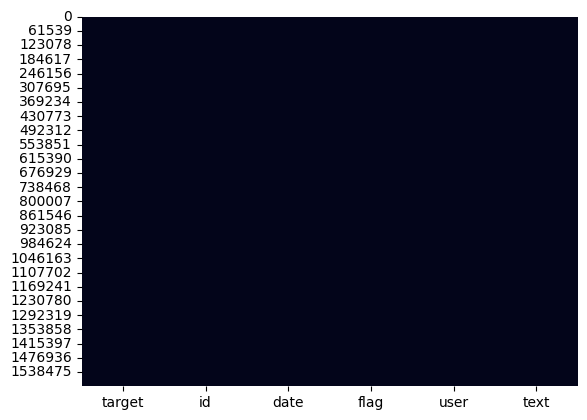

In [16]:
#visualize missing values for all columns
sns.heatmap(df_data.isna(), cbar=False)

In [17]:
df_data.duplicated().sum()

np.int64(0)

In [18]:
print("number of unique values in the dataset:")
for i in cols:
    print(f'{i} : {df_data[i].value_counts().count()}')
display(df_data['target'].value_counts())
display(df_data['flag'].value_counts())

number of unique values in the dataset:
target : 2
id : 1598315
date : 774363
flag : 1
user : 659775
text : 1581466


target
0    800000
4    800000
Name: count, dtype: int64

flag
NO_QUERY    1600000
Name: count, dtype: int64

lets just change the label from 4 -> 1

In [19]:
df_data['target']=df_data['target'].replace(4,1)

In [20]:
df_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

removing flag,user,id column because there in nothing in there which is relevent to outr project

In [21]:
df_data=df_data.drop('flag', axis=1)

In [22]:
display(df_data.sample())
df_data.columns

,target,id,date,user,text
960369,1,1826381414,Sun May 17 08:22:30 PDT 2009,Justinsceneable,Work at 4. Going back to bed


Index(['target', 'id', 'date', 'user', 'text'], dtype='object')

## Stemming
just removing stopwords, keep the keywords for classification

In [23]:
port_stem=PorterStemmer()

In [24]:
def stemming(input):
    stemmed_input=re.sub('[^a-zA-Z]', ' ', input) #Regular Expression function already imported above
    stemmed_input=stemmed_input.lower() #Standardizing the input
    stemmed_input=stemmed_input.split()
    stemmed_input=[port_stem.stem(word) for word in stemmed_input if not word in stopwords.words('english')]
    stemmed_input=' '.join(stemmed_input)

    return stemmed_input

In [25]:
# df_data['stemmed_content']=df_data['text'].apply(stemming)

In [26]:
# df_data.to_csv("Stemmed_Data_Sentiment.csv", index=False)

In [27]:
df_data=pd.read_csv(r'D:\Data Science\Minor-Project\Stemmed_Data_Sentiment.csv')

In [28]:
df_data.sample(2)

,target,id,date,user,text,stemmed_content
935097,1,1792645071,Wed May 13 23:46:37 PDT 2009,iElguera,GOODNIGHT! Church was SO good. Then @Juliamar...,goodnight church good juliamark danc sick im g...
950748,1,1824067083,Sat May 16 23:55:45 PDT 2009,pauloprototype,"Going to bed, night",go bed night


Let's just keep the columns we need to train our model

In [31]:
X=df_data['stemmed_content']
y=df_data['target']
print(y)
print(X)

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64
0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15, stratify=y,random_state=40)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1360000,) (240000,)
(1360000,) (240000,)


### Feature Extraction (Vectorizer): 
Converting text data into numerical data

In [35]:
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.